In [16]:
import pandas as pd
import numpy as np

test_data_path = '/home/pluto2477/Documents/ML_final_report/data/test.csv'
train_data_path = '/home/pluto2477/Documents/ML_final_report/data/train.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

시각화할 수치형 변수 목록 (9개):
['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


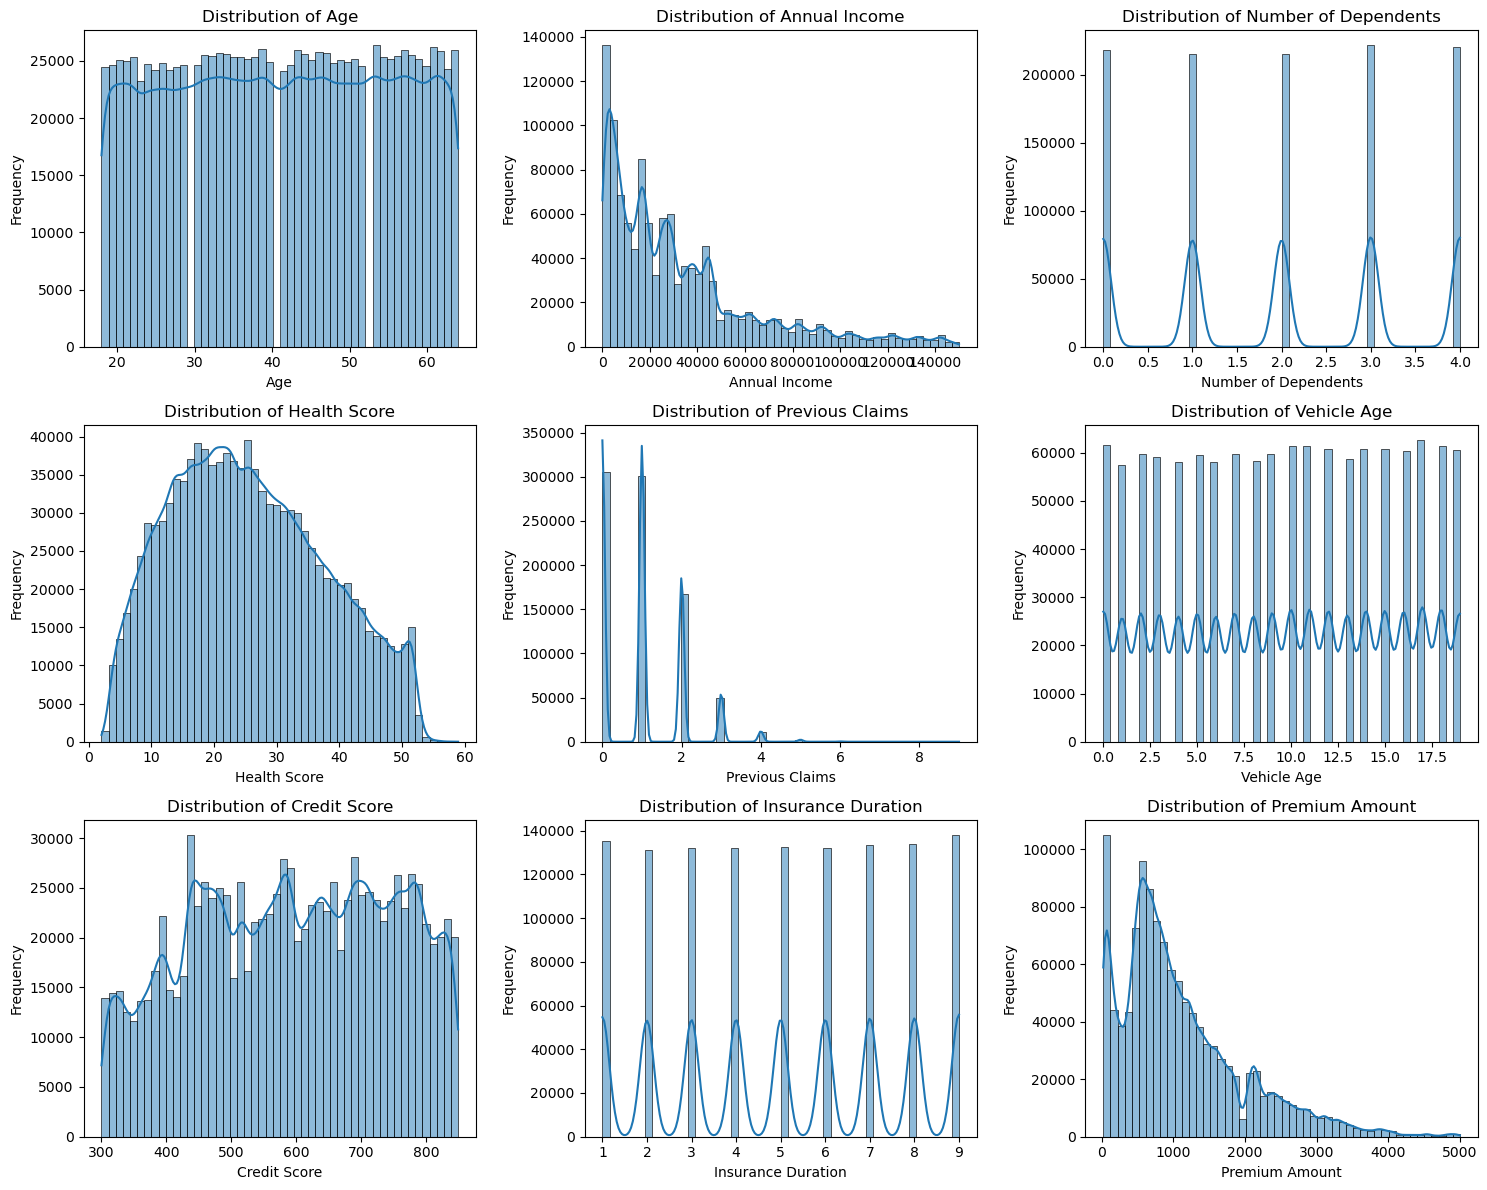

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 수치형 컬럼만 자동 선택 (id 제외)
# float64 타입을 가진 컬럼들만 골라냅니다.
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id') # id는 분포 보는 게 의미 없으니 제거

print(f"시각화할 수치형 변수 목록 ({len(numeric_cols)}개):")
print(numeric_cols)

# 2. 서브플롯 그리드 설정 (3열로 배치)
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

# 3. 각 컬럼별 히스토그램 그리기
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # 0보다 큰 값만 보려면 아래 주석 해제 (로그 변환 고려용)
    # data_to_plot = train_df[train_df[col] > 0][col]
    
    sns.histplot(train_df[col], kde=True, bins=50) # kde=True면 부드러운 곡선도 같이 그려줌
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
object_cols = train_df.select_dtypes(include=['object']).columns
for obj in object_cols:
    print('current column: ', obj)
    print(train_df[obj].unique())
    print(train_df[obj].value_counts(normalize=True))
    print('----------------')

current column:  Gender
['Female' 'Male']
Gender
Male      0.502143
Female    0.497858
Name: proportion, dtype: float64
----------------
current column:  Marital Status
['Married' 'Divorced' 'Single' nan]
Marital Status
Single      0.33466
Married     0.33375
Divorced    0.33159
Name: proportion, dtype: float64
----------------
current column:  Education Level
["Bachelor's" "Master's" 'High School' 'PhD']
Education Level
Master's       0.253182
PhD            0.252922
Bachelor's     0.252695
High School    0.241201
Name: proportion, dtype: float64
----------------
current column:  Occupation
['Self-Employed' nan 'Employed' 'Unemployed']
Occupation
Employed         0.335838
Self-Employed    0.335713
Unemployed       0.328450
Name: proportion, dtype: float64
----------------
current column:  Location
['Urban' 'Rural' 'Suburban']
Location
Suburban    0.334618
Rural       0.334122
Urban       0.331259
Name: proportion, dtype: float64
----------------
current column:  Policy Type
['Premium'

In [20]:
# 결측치가 많으면서도 중요 변수로 가정한 Previous Claims와 Occupation에 대해 결측치 처리
for df in [train_df, test_df]:
   df['Previous Claims'] = df['Previous Claims'].fillna(0)
   df['Occupation'] = df['Occupation'].fillna('Unknown')

print(train_df['Previous Claims'].isnull().sum())
print(train_df['Occupation'].isnull().sum())

0
0


In [21]:
# 수치형, 범주형 컬럼 구분
num_cols = train_df.select_dtypes(include=['number']).columns.tolist()
obj_cols = train_df.select_dtypes(include=['object']).columns.tolist()

if 'id' in num_cols: # id 제외 (학습에 필요하지 않음)
    train_df = train_df.drop('id', axis=1, errors='ignore')
    test_df = test_df.drop('id', axis=1, errors='ignore')
    num_cols.remove('id')

if 'Premium Amount' in num_cols:
    # train_df = train_df.drop('Premium Amount', axis=1, errors='ignore')
    num_cols.remove('Premium Amount')

print(train_df.columns)
print(test_df.columns)
print(set(train_df.columns) - set(test_df.columns))

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')
{'Premium Amount'}


In [22]:
# 수치형 : train에서의 평균값으로 결측치 채우기
for col in num_cols:
    mean_val = train_df[col].mean()
    for df in [train_df, test_df]:
        df[col] = df[col].fillna(mean_val)

# 범주형 : train에서의 최빈값으로 결측치 채우기
for col in obj_cols : 
    mode_val = train_df[col].mode()[0]
    for df in [train_df, test_df]:
        df[col] = df[col].fillna(mode_val)

print('train 결측치 확인 : ', train_df.isnull().sum())
print('test 결측치 확인 : ', test_df.isnull().sum())

train 결측치 확인 :  Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64
test 결측치 확인 :  Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status      

In [23]:
# 학력, 고객피드백, 운동 빈도에 대해 순서를 매핑
print(train_df["Education Level"].unique())
edu_map = {
    "High School" : 0,
    "Bachelor's" : 1,
    "Master's" : 2,
    "PhD" : 3
}
feed_map = {
    "Poor" : 0,
    "Average" : 1,
    "Good" : 2
}
exe_map = {
    'Rarely': 0,
    'Monthly': 1,
    'Weekly': 2,
    'Daily': 3,
}
map_list = [edu_map, feed_map, exe_map]

for df in [train_df, test_df] :
  df["Education Level"] = df["Education Level"].map(edu_map)
  df["Customer Feedback"] = df["Customer Feedback"].map(feed_map)
  df["Exercise Frequency"] = df["Exercise Frequency"].map(exe_map)

print(train_df['Education Level'].value_counts())
print(train_df['Customer Feedback'].value_counts())
print(train_df['Exercise Frequency'].value_counts())

["Bachelor's" "Master's" 'High School' 'PhD']
Education Level
2    303818
3    303507
1    303234
0    289441
Name: count, dtype: int64
Customer Feedback
1    455729
0    375518
2    368753
Name: count, dtype: int64
Exercise Frequency
2    306179
1    299830
0    299420
3    294571
Name: count, dtype: int64


In [24]:
# 날짜 데이터 처리
for df in [train_df, test_df] :
  df["Policy Start Date"] = pd.to_datetime(df["Policy Start Date"]) # 날짜 형변환

  df["Policy Year"] = df["Policy Start Date"].dt.year # 연/월 추출
  df["Policy Month"] = df["Policy Start Date"].dt.month

  df = df.drop('Policy Start Date', axis=1, inplace=True) # 원래 컬럼 제거

print(train_df.columns)

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Policy Year', 'Policy Month'],
      dtype='object')


In [25]:
# 1. 흡연 여부 수치화 (Yes=1, No=0)
# 'Smoking Status'는 나중에 One-Hot Encoding 되더라도, 계산을 위해 숫자로 된 컬럼을 하나 만듭니다.
smoke_map = {'No': 0, 'Yes': 1}

for df in [train_df, test_df]:
    # 먼저 흡연 여부를 0과 1로 변환 (계산용)
    df['Smoking_Val'] = df['Smoking Status'].map(smoke_map)
    
    # ---------------------------------------------------------
    # 파생변수 생성
    # ---------------------------------------------------------
    
    # 1. 나이 x 흡연 (고령 흡연자 위험 가중)
    df['Interaction_Age_Smoke'] = df['Age'] * df['Smoking_Val']
    
    # 2. 건강 점수 x 운동 빈도 (건강 관리 노력도)
    # Exercise Frequency는 이미 0,1,2,3 숫자로 바뀌어 있다고 가정합니다.
    # (+1을 하는 이유는 0을 곱해서 정보가 사라지는 것을 방지)
    df['Interaction_Health_Habit'] = df['Health Score'] * (df['Exercise Frequency'] + 1)
    
    # 3. 건강 점수 / 나이 (나이 보정 건강 점수)
    # 나이가 많을수록 같은 점수라도 가치가 다름 (분모 0 방지 위해 아주 작은 수 더함)
    df['Derived_Health_per_Age'] = df['Health Score'] / (df['Age'] + 1e-5)

In [26]:
final_obj_cols= train_df.select_dtypes(include=['object']).columns
# for df in [train_df, test_df]:
#   df = pd.get_dummies(df, columns=final_obj_cols, drop_first=True)

train_df = pd.get_dummies(train_df, columns=final_obj_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=final_obj_cols, drop_first=True)

print("train shape",train_df.shape)
print("test shape",test_df.shape)

print(set(train_df.columns) - set(test_df.columns))


train shape (1200000, 31)
test shape (800000, 30)
{'Premium Amount'}


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Age                        1200000 non-null  float64
 1   Annual Income              1200000 non-null  float64
 2   Number of Dependents       1200000 non-null  float64
 3   Education Level            1200000 non-null  int64  
 4   Health Score               1200000 non-null  float64
 5   Previous Claims            1200000 non-null  float64
 6   Vehicle Age                1200000 non-null  float64
 7   Credit Score               1200000 non-null  float64
 8   Insurance Duration         1200000 non-null  float64
 9   Customer Feedback          1200000 non-null  int64  
 10  Exercise Frequency         1200000 non-null  int64  
 11  Premium Amount             1200000 non-null  float64
 12  Policy Year                1200000 non-null  int32  
 13  Policy Month

Log-transformed: Premium Amount
Log-transformed: Annual Income
Log-transformed: Previous Claims


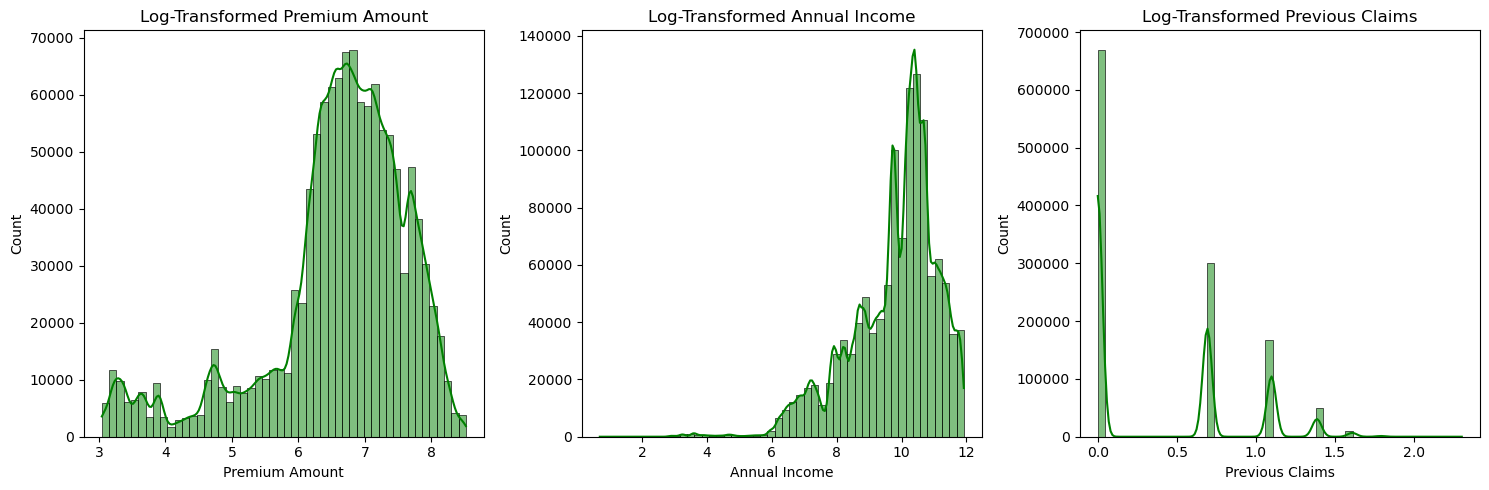

In [28]:
# 1. 로그 변환 변수 목록 정의
log_targets = ['Premium Amount', 'Annual Income', 'Previous Claims']

# 2. 변환 적용
for col in log_targets:
    if col in train_df.columns:
        train_df[col] = np.log1p(train_df[col])
        if col in test_df.columns: # 타겟(Premium Amount)은 test_df에 없을 수 있음
            test_df[col] = np.log1p(test_df[col])
        print(f"Log-transformed: {col}")

# 3. 변환 후 분포 시각화 (확인사살)
plt.figure(figsize=(15, 5))
for i, col in enumerate(log_targets):
    plt.subplot(1, 3, i+1)
    sns.histplot(train_df[col], kde=True, bins=50, color='green')
    plt.title(f'Log-Transformed {col}')
plt.tight_layout()
plt.show()

In [29]:
# # ---------------------------------------------------------
# # Target 변수(Premium Amount) 로그 변환
# # 목적: 데이터의 왜도(Skewness)를 줄여서 선형성을 확보하고 모델 학습을 도움
# # ---------------------------------------------------------

# # Log 변환 (log1p는 0일 때 무한대로 가는 것을 막기 위해 log(x+1)을 계산함)
# train_df['Premium Amount'] = np.log1p(train_df['Premium Amount'])

# # 변환이 잘 되었는지 확인 (평균값이 확 줄어들었을 겁니다)
# print("Log Transformed Premium Mean:", train_df['Premium Amount'].mean())
# # (선택) 분포가 예뻐졌는지 보려면 아래 주석을 풀고 실행해보세요
# train_df['Premium Amount'].hist(bins=100)

In [30]:
train_save_path = "/home/pluto2477/Documents/ML_final_report/data/train_log_processed_final.csv"
test_save_path = "/home/pluto2477/Documents/ML_final_report/data/test_log_processed_final.csv"

train_df.to_csv(train_save_path, index=False)
test_df.to_csv(test_save_path, index=False)